# Organizational Bias Exploration 
#### Pulling data from MediaBiasFactCheck.com and AllSides.com

Matthew Fishman, Practicum Milestone 1

### Get/Clean Data

In [24]:
import json, pandas as pd
from pandas.io.json import json_normalize

# AllSides data
dfAllSides = pd.read_json('AllSidesALL.json')
dfAllSides['name'] = dfAllSides['name'].str.replace('!', '')
dfAllSides = dfAllSides.set_index('website_url')
dfAllSides['total_votes'] = dfAllSides.apply(lambda row: row.agree + row.disagree, axis=1)
dfAllSides = dfAllSides[['bias','confidence','agree_ratio','total_votes','agreeance_text','name']]  #website_url omitted
dfAllSides = dfAllSides.rename(columns={'agreeance_text':'community_response'})


# MediaBiasFactCheck data
dfMBFC = pd.read_json('MBFCsourcesALL.json')
dfMBFC = dfMBFC.T
# dfMBFC = dfMBFC.set_index("name")
dfMBFC = dfMBFC[dfMBFC.bias != '']
dfMBFC = dfMBFC[['bias','homepage','facebook_url']]
dfMBFC = dfMBFC.rename(columns={'homepage':'website_url'})

### Normalize Data

In [11]:
# Figure out possible values
set(dfAllSides.bias)
#{'allsides', 'center', 'lean left', 'lean right', 'left', 'mixed', 'right'}

set(dfMBFC.bias)
#{center', 'conspiracy', 'fake-news', 'left', 'left-center', 'pro-science', 'right', 'right-center', 'satire'}


{'center',
 'conspiracy',
 'fake-news',
 'left',
 'left-center',
 'pro-science',
 'right',
 'right-center',
 'satire'}

In [25]:
# Drop 'mixed/allsides' sites that give perspectives from both sides of the policial spectrum
dfAllSides = dfAllSides[(dfAllSides.bias != 'mixed')
                       & (dfAllSides.bias != 'allsides')]
dfAllSides = dfAllSides[~dfAllSides.index.duplicated(keep='first')]


# dfAllSides

dfAllSides.to_json(r'C:\Users\Matthew\OneDrive\Semester 8\Data Science Capstone\PolitiGauge\Extension\AllSidesFinal.json')



# # Drop non-political scale sources (about 900/2500)
dfMBFC = dfMBFC[(dfMBFC.bias != 'conspiracy') 
                & (dfMBFC.bias != 'fake-news') 
                & (dfMBFC.bias !='pro-science') 
                & (dfMBFC.bias != 'satire')]

# Remove the four duplicates
dfMBFC = dfMBFC[~dfMBFC.index.duplicated(keep='first')]
dfMBFC

dfMBFC.to_json(r'C:\Users\Matthew\OneDrive\Semester 8\Data Science Capstone\PolitiGauge\Extension\MBFCFinal.json')

In [4]:
#get total ratings for AllSides
dfAllSides.shape

(263, 6)

In [5]:
#get total ratings for AllSides
dfMBFC.shape

(1554, 3)

In [7]:
# All data
dfMerged = dfAllSides.merge(dfMBFC, how='outer', left_index=True, right_index=True)

# Just common media sources
# dfMerged = pd.merge(dfAllSides, dfMBFC, left_index=True, right_index=True)
dfMerged = dfMerged.drop_duplicates()

dfMerged.to_json(r'\OrgDataMerged.json')
# set(dfAllSides.confidence)

ValueError: DataFrame index must be unique for orient='columns'.

## Data Visualizations

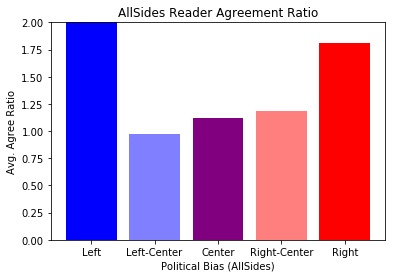

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#for every news source in AllSides,
#  Split up into agree ratios and show chart


#Get average agree ratio for AllSides by political bias
def getAvgAgreeRatio(dfBias):
    left = dfAllSides.loc[dfAllSides['bias'] == 'left'].loc[:,"agree_ratio"].mean()
    centerLeft = dfAllSides.loc[dfAllSides['bias'] == 'left-center'].loc[:,"agree_ratio"].mean()
    center = dfAllSides.loc[dfAllSides['bias'] == 'center'].loc[:,"agree_ratio"].mean()
    centerRight = dfAllSides.loc[dfAllSides['bias'] == 'right-center'].loc[:,"agree_ratio"].mean()
    right = dfAllSides.loc[dfAllSides['bias'] == 'right'].loc[:,"agree_ratio"].mean()
    return left, centerLeft, center, centerRight, right

fig, ax = plt.subplots()
ind = np.arange(5)

left, centerLeft, center, centerRight, right = plt.bar(ind, getAvgAgreeRatio(dfAllSides))
left.set_facecolor('b')
centerLeft.set_facecolor('b')
centerLeft.set_alpha(0.5)
center.set_facecolor('purple')
centerRight.set_facecolor('r')
centerRight.set_alpha(0.5)
right.set_facecolor('r')

ax.set_xticks(ind)
ax.set_xticklabels(['Left', 'Left-Center', 'Center', 'Right-Center', 'Right'])
ax.set_xlabel('Political Bias (AllSides)')
ax.set_ylim([0, 2])
ax.set_ylabel('Avg. Agree Ratio')
ax.set_title('AllSides Reader Agreement Ratio')

# show the figure, but do not block
plt.show(block=False)

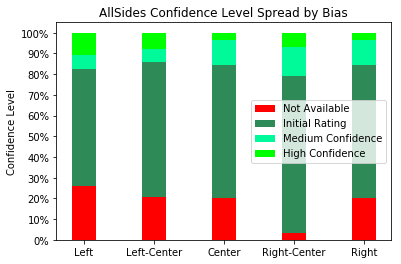

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Get confidence level on split bar chart 

def getConfidence(biasLevel):
    L = len(dfBiasL.loc[dfBiasL['confidence'] == biasLevel].index)
    totalL = len(dfBiasL.index)
    LC = len(dfBiasLC.loc[dfBiasLC['confidence'] == biasLevel].index)
    totalLC = len(dfBiasLC.index)
    C = len(dfBiasC.loc[dfBiasC['confidence'] == biasLevel].index)
    totalC = len(dfBiasC.index)
    RC = len(dfBiasRC.loc[dfBiasRC['confidence'] == biasLevel].index)
    totalRC = len(dfBiasRC.index)
    R = len(dfBiasR.loc[dfBiasR['confidence'] == biasLevel].index)
    totalR = len(dfBiasR.index)
    
    return [100*L/totalL, 100*LC/totalLC, 100*C/totalC, 100*RC/totalRC, 100*R/totalR]


N = 5
dfBiasL = dfAllSides.loc[dfAllSides['bias'] == 'left']
dfBiasLC = dfAllSides.loc[dfAllSides['bias'] == 'left-center']
dfBiasC = dfAllSides.loc[dfAllSides['bias'] == 'center']
dfBiasRC = dfAllSides.loc[dfAllSides['bias'] == 'right-center']
dfBiasR = dfAllSides.loc[dfAllSides['bias'] == 'center']

highConfidence = getConfidence('High')
mediumConfidence = getConfidence('Medium')
initialConfidence = getConfidence('Low or Initial Rating')
noConfidence = getConfidence('Not Available')
    
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence


updatedY = [noConfidence[i]+initialConfidence[i] for i in range(len(noConfidence))]

p1 = plt.bar(ind, noConfidence, width, color=('red'))
p2 = plt.bar(ind, initialConfidence, width, color=('seaGreen'),
             bottom=noConfidence)
p3 = plt.bar(ind, mediumConfidence, width, color=('MediumSpringGreen'),
             bottom=updatedY)
updatedY2 = [updatedY[i]+mediumConfidence[i] for i in range(len(updatedY))]
p4 = plt.bar(ind, highConfidence, width, color=('Lime'),
             bottom=updatedY2)



plt.ylabel('Confidence Level')
plt.title('AllSides Confidence Level Spread by Bias')
plt.xticks(ind, ('Left', 'Left-Center', 'Center', 'Right-Center', 'Right'))
plt.yticks(np.arange(0, 101, 10))
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Not Available', 'Initial Rating', 'Medium Confidence', 'High Confidence'))

plt.show()

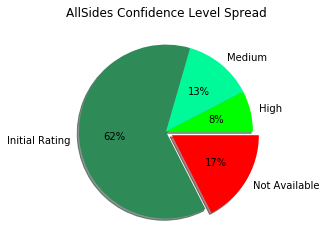

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Get confidence split on PIE chart

def getConfidence():
    high = len(dfAllSides.loc[dfAllSides['confidence'] == 'High'].index)
    medium = len(dfAllSides.loc[dfAllSides['confidence'] == 'Medium'].index)
    low = len(dfAllSides.loc[dfAllSides['confidence'] == 'Low or Initial Rating'].index)
    NA = len(dfAllSides.loc[dfAllSides['confidence'] == 'Not Available'].index)
    total = len(dfAllSides.index)
    
    return [100*high/total, 100*medium/total, 100*low/total, 100*NA/total]


N = 5

# Some data
labels = 'High', 'Medium', 'Initial Rating', 'Not Available'
fracs = getConfidence()

# Make figure and axes
fig, ax = plt.subplots()

# A standard pie plot
# ax.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)
colorArray = ['Lime', 'MediumSpringGreen', 'SeaGreen', 'red']

# Shift the second slice using explode
ax.pie(fracs, labels=labels, colors=colorArray, autopct='%.0f%%', shadow=True,
              explode=(0, 0, 0, 0.08))

plt.title('AllSides Confidence Level Spread')


#-------------------------------------------------------------------

fig.savefig('ConfSpread.png', transparent=True)

plt.show()

### Find Amount of Discrepancy Between AllSides and MBFC

In [24]:
discrepancy = dfMerged.loc[dfMerged['bias_x'] != dfMerged['bias_y']]
# discrepancy
discrepancy_total = len(discrepancy.index)
total = len(dfMerged.index) 
ratio_discrepancy = len(discrepancy.index)/len(dfMerged.index)     
total
# ratio_discrepancy
#33.7% disagree
#18/50 disagreed upon

# discrepancy['agree_ratio'].mean()    #1.08 avg reader agreement ratio
# len(discrepancy.loc[discrepancy['confidence'] == 'Not Available'].index)     #5/18 
# len(discrepancy.loc[discrepancy['confidence'] == 'Low or Initial Rating'].index)      #10/18
# len(discrepancy.loc[discrepancy['confidence'] == 'Medium'].index)      #2/18
# len(discrepancy.loc[discrepancy['confidence'] == 'High'].index)      #1/18

101

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
#for every news source in AllSides,
#  Split up into agree ratios and show chart


#Get most popular agreed-upon news sources
dfMergedPop = dfMerged.loc[dfMerged['total_votes'] > 93]

#Graph them
ax = sns.stripplot('bias', 'Popularity', data=dfMerged, 
                   order=['left', 'left-center', 'center', 'right-center', 'right'], 
                   palette=sns.diverging_palette(258, 12, n=5), edgecolor='black', linewidth=.5)
plt.title('AllSides Reader Agree Ratio')
plt.xlabel('Political Bias')
plt.ylabel('Avg. Agree Ratio')

#Label them
def label_point(category, y, val, ax):
    spacing = .1
    a = pd.concat({'x': category, 'y': y, 'val': val}, axis=1)
    for j, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+spacing, str(point['val']))
        spacing *= -1


dfBiasLoc = dfMergedPop.bias
dfMergedPop.loc[dfMergedPop.bias == "left", 'pos'] = 0.1
dfMergedPop.loc[dfMergedPop.bias == "left-center", 'pos'] = 1.1
dfMergedPop.loc[dfMergedPop.bias == "center", 'pos'] = 2.1
dfMergedPop.loc[dfMergedPop.bias == "right-center", 'pos'] = 3.1
dfMergedPop.loc[dfMergedPop.bias == "right", 'pos'] = 4.1
label_point(dfMergedPop.pos, dfMergedPop.Popularity, dfMergedPop.name, plt.gca())  

In [ ]:
#Export cleaned data
dfAllSides.to_json(r'C:\Users\Matthew\OneDrive\Semester 8\Data Science Capstone\PolitiGauge\notebooks\OrganizationalBias\CleanedAllSides.json',orient="index")
dfMBFC.to_json(r'C:\Users\Matthew\OneDrive\Semester 8\Data Science Capstone\PolitiGauge\notebooks\OrganizationalBias\CleanedMBFC.json',orient="index")

# Compare Author Data to Media Source Data

In [8]:
import json, pandas as pd
from pandas.io.json import json_normalize

# AllSides data
dfAllSidesAuth = pd.read_json('AllSidesAuthors.json')
dfAllSidesAuth['name'] = dfAllSidesAuth['name'].str.replace('!', '')
dfAllSidesAuth = dfAllSidesAuth.set_index('name')
dfAllSidesAuth['total_votes'] = dfAllSidesAuth.apply(lambda row: row.agree + row.disagree, axis=1)
dfAllSidesAuth = dfAllSidesAuth.rename(columns={'agreeance_text':'community_response'})

# Drop 'mixed/allsides' sites that give perspectives from both sides of the policial spectrum
dfAllSidesAuth = dfAllSidesAuth[(dfAllSidesAuth.bias != 'mixed')
                       & (dfAllSidesAuth.bias != 'allsides')]


dfAllSidesAuthors = dfAllSidesAuth.merge(dfAllSides, how='left', left_index=True, right_index=True)
dfAllSidesAuthors = dfAllSidesAuthors.drop_duplicates()
# dfAllSidesAuthors


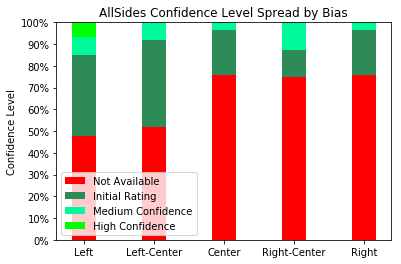

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Get confidence level on split bar chart 

def getConfidence(biasLevel):
    L = len(dfBiasL.loc[dfBiasL['confidence'] == biasLevel].index)
    totalL = len(dfBiasL.index)
    LC = len(dfBiasLC.loc[dfBiasLC['confidence'] == biasLevel].index)
    totalLC = len(dfBiasLC.index)
    C = len(dfBiasC.loc[dfBiasC['confidence'] == biasLevel].index)
    totalC = len(dfBiasC.index)
    RC = len(dfBiasRC.loc[dfBiasRC['confidence'] == biasLevel].index)
    totalRC = len(dfBiasRC.index)
    R = len(dfBiasR.loc[dfBiasR['confidence'] == biasLevel].index)
    totalR = len(dfBiasR.index)
    
    return [100*L/totalL, 100*LC/totalLC, 100*C/totalC, 100*RC/totalRC, 100*R/totalR]

def getNoConfidence():
    L = len(dfBiasL.loc[dfBiasL['confidence'] == 'Not Available'].index)
    LNull = len(dfBiasL.loc[dfBiasL['confidence'].isnull()].index)
    totalL = len(dfBiasL.index)
    LC = len(dfBiasLC.loc[dfBiasLC['confidence'] == 'Not Available'].index)
    LCNull = len(dfBiasLC.loc[dfBiasLC['confidence'].isnull()].index)
    totalLC = len(dfBiasLC.index)
    C = len(dfBiasC.loc[dfBiasC['confidence'] == 'Not Available'].index)
    CNull = len(dfBiasC.loc[dfBiasC['confidence'].isnull()].index)
    totalC = len(dfBiasC.index)
    RC = len(dfBiasRC.loc[dfBiasRC['confidence'] == 'Not Available'].index)
    RCNull = len(dfBiasRC.loc[dfBiasRC['confidence'].isnull()].index)
    totalRC = len(dfBiasRC.index)
    R = len(dfBiasR.loc[dfBiasR['confidence'] == 'Not Available'].index)
    RNull = len(dfBiasR.loc[dfBiasR['confidence'].isnull()].index)
    totalR = len(dfBiasR.index)
    
    return [100*(L+LNull)/totalL, 100*(LC+LCNull)/totalLC, 100*(C+CNull)/totalC, 100*(RC+RCNull)/totalRC, 100*(R+RNull)/totalR]

N = 5 
dfBiasLC = dfAllSidesAuthors.loc[dfAllSidesAuthors['bias_x'] == 'left-center']
dfBiasC = dfAllSidesAuthors.loc[dfAllSidesAuthors['bias_x'] == 'center']
dfBiasRC = dfAllSidesAuthors.loc[dfAllSidesAuthors['bias_x'] == 'right-center']
dfBiasR = dfAllSidesAuthors.loc[dfAllSidesAuthors['bias_x'] == 'center']

highConfidence = getConfidence('High')
mediumConfidence = getConfidence('Medium')
initialConfidence = getConfidence('Low or Initial Rating')
noConfidence = getNoConfidence()
    
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence


updatedY = [noConfidence[i]+initialConfidence[i] for i in range(len(noConfidence))]

p1 = plt.bar(ind, noConfidence, width, color=('red'))
p2 = plt.bar(ind, initialConfidence, width, color=('seaGreen'),
             bottom=noConfidence)
p3 = plt.bar(ind, mediumConfidence, width, color=('MediumSpringGreen'),
             bottom=updatedY)
updatedY2 = [updatedY[i]+mediumConfidence[i] for i in range(len(updatedY))]
p4 = plt.bar(ind, highConfidence, width, color=('Lime'),
             bottom=updatedY2)



plt.ylabel('Confidence Level')
plt.title('AllSides Confidence Level Spread by Bias')
plt.xticks(ind, ('Left', 'Left-Center', 'Center', 'Right-Center', 'Right'))
plt.yticks(np.arange(0, 101, 10))
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()]) 
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('Not Available', 'Initial Rating', 'Medium Confidence', 'High Confidence'))

plt.show()

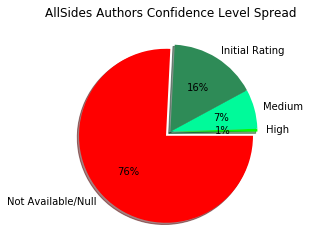

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Get confidence split on PIE chart

def getConfidence():
    high = len(dfAllSidesAuthors.loc[dfAllSidesAuthors['confidence'] == 'High'].index)
    medium = len(dfAllSidesAuthors.loc[dfAllSidesAuthors['confidence'] == 'Medium'].index)
    low = len(dfAllSidesAuthors.loc[dfAllSidesAuthors['confidence'] == 'Low or Initial Rating'].index)
    NA = len(dfAllSidesAuthors.loc[dfAllSidesAuthors['confidence'] == 'Not Available'].index)
    NaN = len(dfAllSidesAuthors.loc[dfAllSidesAuthors['confidence'].isnull()].index)
    total = len(dfAllSidesAuthors.index)
    
    return [100*high/total, 100*medium/total, 100*low/total, 100*NA/total + 100*NaN/total]



# Some data
labels = 'High', 'Medium', 'Initial Rating', 'Not Available/Null'
fracs = getConfidence()

# Make figure and axes
fig, ax = plt.subplots()

# A standard pie plot
# ax.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)
colorArray = ['Lime', 'MediumSpringGreen', 'SeaGreen', 'red']

# Shift the second slice using explode
ax.pie(fracs, labels=labels, colors=colorArray, autopct='%.0f%%', shadow=True,
              explode=(0, 0, 0, 0.07))

plt.title('AllSides Authors Confidence Level Spread')


#-------------------------------------------------------------------
    

plt.show()